# Tarea Visión Artificial
### Integrantes: Álvaro Parker, Erick Bey y Matías Orozco.

### Librerias Generales necesarias

In [2]:
import cv2
import matplotlib.pyplot as plt

### Eliminación de Ruido (Filtro de la Mediana)

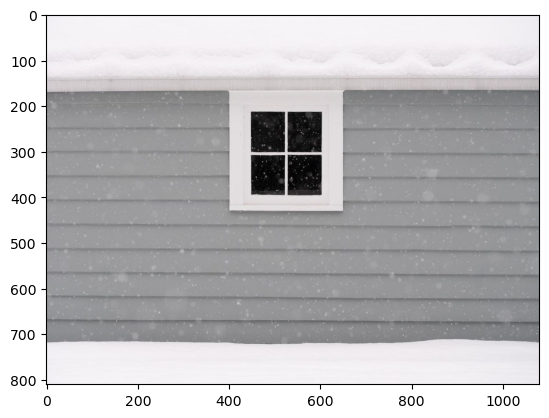

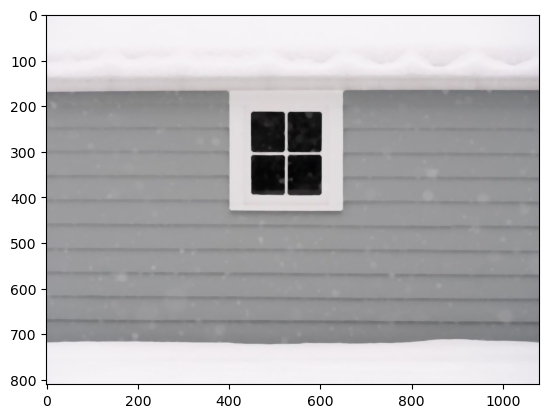

In [15]:
#lectura de imagen
img = cv2.imread("images/ruido2.jpg")

#transformación a niveles de gris
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

#aplicamos el filtro
img_median = cv2.medianBlur(img_rgb,9)

cv2.imwrite('images/resultado_ruido.jpg',cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.imshow(img_median)
plt.show()

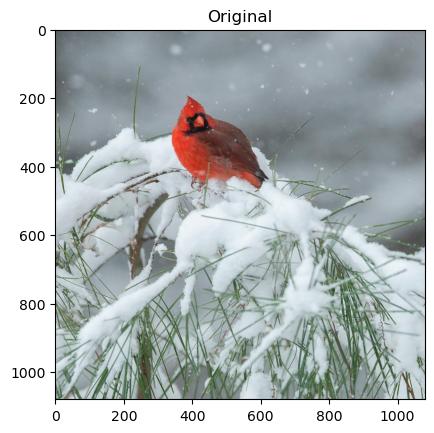

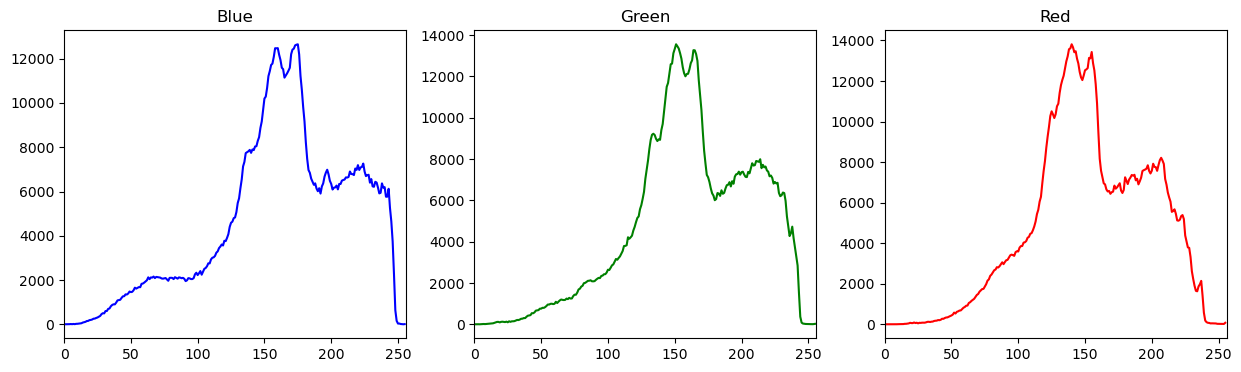

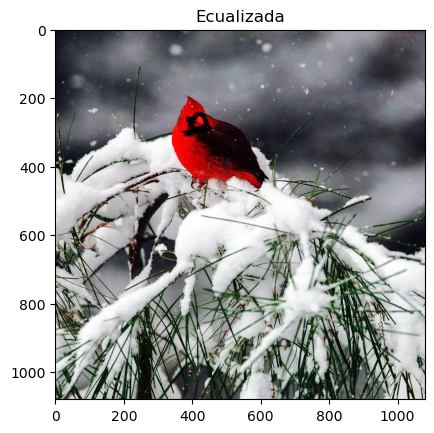

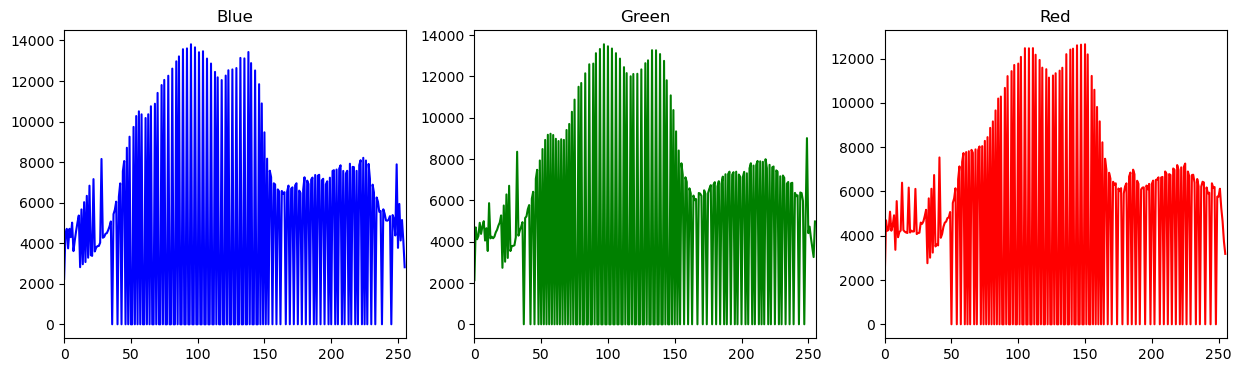

In [16]:
from ast import Eq
import numpy as np

#lectura de la imagen
img = cv2.imread('images/ecualizacion.jpg')
m,n,ch = img.shape

blue, green, red= cv2.split(img)

# Ecualizando los 3 colores por separado
eq_blue  = cv2.equalizeHist(blue)
eq_green = cv2.equalizeHist(green)
eq_red   = cv2.equalizeHist(red)

#seteamos el output para tres canales de tipo uint8
out = cv2.merge([eq_red, eq_green, eq_blue])

# imagen original
plt.imshow(img[:,:,[2,1,0]])
plt.title("Original")
plt.show()

#calculo de histograma originales
hist_blue = cv2.calcHist([img],[0],None,[256],[0,256])
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
hist_red = cv2.calcHist([img],[2],None,[256],[0,256])


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Blue")
plt.plot(hist_blue, 'b')
plt.xlim([0,256])

plt.subplot(1, 3, 2)
plt.title("Green")
plt.plot(hist_green, 'g')
plt.xlim([0,256])

plt.subplot(1, 3, 3)
plt.title("Red")
plt.plot(hist_red, 'r')
plt.xlim([0,256])

plt.show()

# Resultados
plt.imshow(out)
plt.title("Ecualizada")
plt.show()

#calculo de histograma originales
hist_blue = cv2.calcHist([out],[0],None,[256],[0,256])
hist_green = cv2.calcHist([out],[1],None,[256],[0,256])
hist_red = cv2.calcHist([out],[2],None,[256],[0,256])

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Blue")
plt.plot(hist_blue, 'b')
plt.xlim([0,256])

plt.subplot(1, 3, 2)
plt.title("Green")
plt.plot(hist_green, 'g')
plt.xlim([0,256])

plt.subplot(1, 3, 3)
plt.title("Red")
plt.plot(hist_red, 'r')
plt.xlim([0,256])

plt.show()

### Top-Hat y Binarización

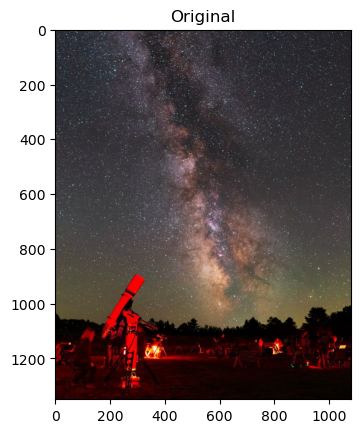

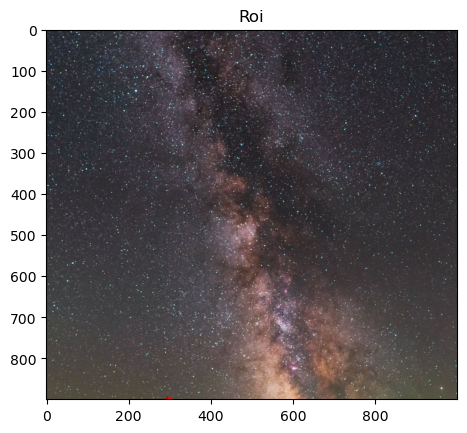

In [8]:
# Leer imagen
img = cv2.imread('images/tophat.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen Original
plt.imshow(img_rgb)
plt.title('Original')
plt.show()

# Roi
img_roi = img_rgb[0:900,0:1000,:]
plt.imshow(img_roi)
plt.title('Roi')
plt.show()


#### Top-Hat: $A - (A \ominus B) \oplus B $

##### Definimos el kernel a utilizar

In [9]:
# MORPH_CROSS, MORPH_ELLIPSE, MORPH_RECT
N = 8
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N))
print(kernel)

[[0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]]


##### Resolvemos la erosión para cada canal: $ A\ominus B $

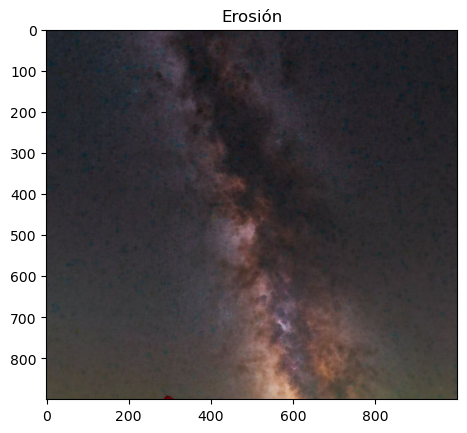

In [10]:
erosion = cv2.erode(img_roi,kernel)

plt.imshow(erosion, cmap="gray")
plt.title('Erosión')
plt.show()

#### Luego, al resultado anterior se le aplica dilatación: $ A' \oplus B $

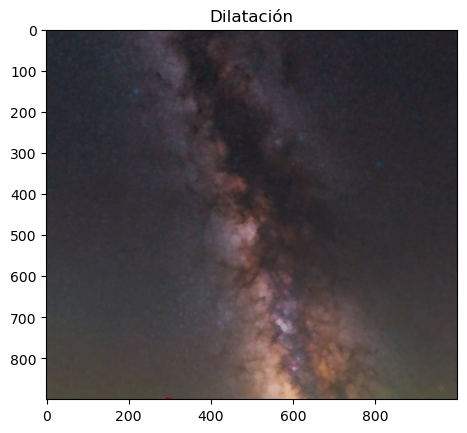

In [11]:
dilate_erosion = cv2.dilate(erosion,kernel)
plt.imshow(dilate_erosion, cmap="gray")
plt.title('Dilatación')
plt.show()


##### Finalmente, "restamos" la imagen original con el resultado de la apertura.

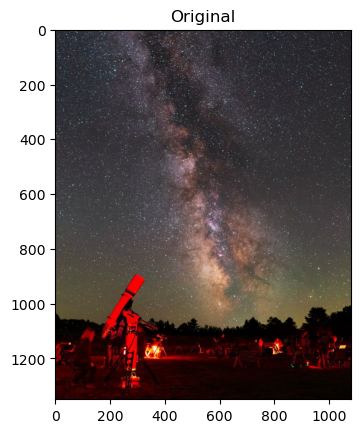

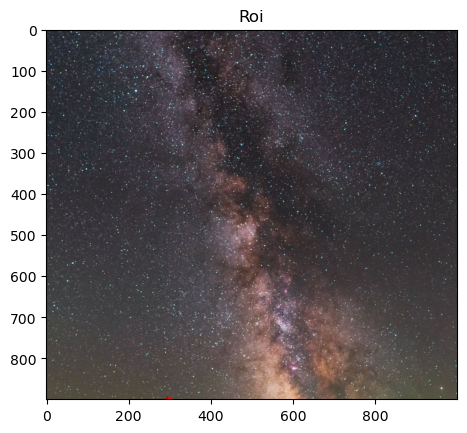

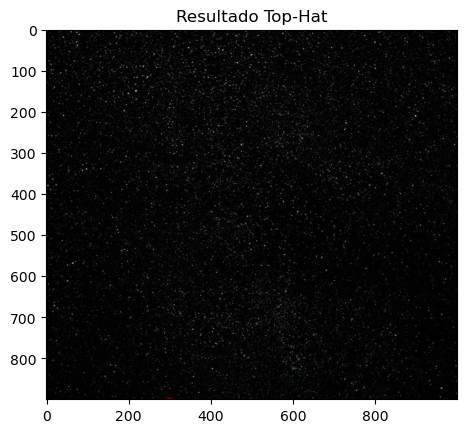

In [12]:
out = cv2.subtract(img_roi,dilate_erosion)

plt.imshow(img_rgb)
plt.title('Original')
plt.show()

plt.imshow(img_roi)
plt.title('Roi')
plt.show()

plt.imshow(out)
plt.title('Resultado Top-Hat')
plt.show()


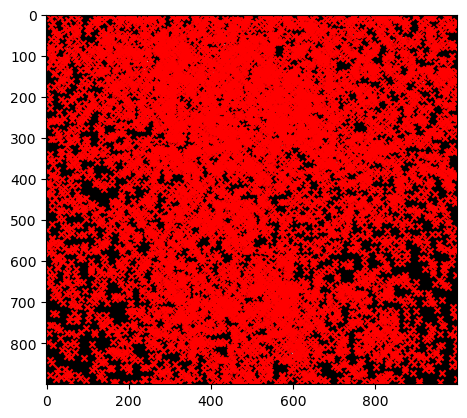

In [13]:
from skimage.filters import threshold_otsu
from skimage import measure

gray = out[:,:,0]

# Buscamos umbral con otsu
thresh = threshold_otsu(gray)
binary = gray > thresh # Esta operación binaria permite segmentar las estructuras

# componentes conectados
all_labels = measure.label(binary)

# Threshold data
centroids = []
areas = []
plt.imshow(binary, cmap="gray")

for region in measure.regionprops(label_image=all_labels):
	cx, cy = region.centroid[0], region.centroid[1]
	areas.append(region.area)
	centroids.append((cx, cy))
	plt.scatter(cy, cx, marker="x", color="red", s=20)

plt.show()

Text(0.5, 1.0, 'Estrellas según área')

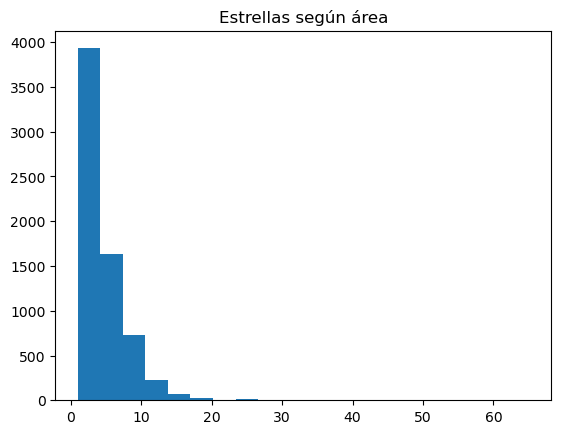

In [19]:
plt.figure()
counts, bins = np.histogram(areas, bins=20) # areas guarda el área de cada estrella de la imagen
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Estrellas según área")